In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('bmh')
import seaborn as sns
from collections import Counter

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [3]:
Dataset = pd.read_csv("../NGS-DataAnalysis/Results/HARP-NB-Round4-CDR3.csv")
Dataset1 = pd.read_csv("../NGS-DataAnalysis/Results/HARP-NB-Round2-CDR3.csv")

Dataset['Rand'] = Dataset['CDR3'].str.slice(1)
Dataset1['Rand'] = Dataset1['CDR3'].str.slice(1)

# Function to remove the character before the last one from each sequence
def remove_char_before_last(seq):
    if len(seq) > 1:
        return seq[:-2] + seq[-1]  # Keep everything except the second-to-last character and append the last character
    else:
        return seq  # If the sequence has only one character, leave it as it is

# Apply the function to remove the character before the last one from each CDR3 sequence
Dataset['Only Random All'] = Dataset['Rand'].apply(remove_char_before_last)
Dataset1['Only Random All'] = Dataset1['Rand'].apply(remove_char_before_last)

###CDR3-RAND
Dataset ["Random Region Middle"] = Dataset ["Rand"].astype(str).str[:-2]
Dataset.loc[:, 'CDR3_length-rmid'] = Dataset['Random Region Middle'].apply(lambda x: len(x) if isinstance(x, str) else 0)

Dataset1 ["Random Region Middle"] = Dataset1 ["Rand"].astype(str).str[:-2]
Dataset1.loc[:, 'CDR3_length-rmid'] = Dataset1['Random Region Middle'].apply(lambda x: len(x) if isinstance(x, str) else 0)


Dataset

,CDR3,Number of Reads,Rand,Only Random All,Random Region Middle,CDR3_length-rmid
0,AYEIDWPYFG,2006,YEIDWPYFG,YEIDWPYG,YEIDWPY,7
1,VDRGDTGPYP,1961,DRGDTGPYP,DRGDTGPP,DRGDTGP,7
2,AYTYVENQGYYYFA,1899,YTYVENQGYYYFA,YTYVENQGYYYA,YTYVENQGYYY,11
3,AEYTEVDFGSNYWSYGHF,1590,EYTEVDFGSNYWSYGHF,EYTEVDFGSNYWSYGF,EYTEVDFGSNYWSYG,15
4,ADVAIYYWLL,1134,DVAIYYWLL,DVAIYYWL,DVAIYYW,7
...,...,...,...,...,...,...
1273,AYWLGDVLYQ,1,YWLGDVLYQ,YWLGDVLQ,YWLGDVL,7
1274,AYYDTSSYLVYGHI,1,YYDTSSYLVYGHI,YYDTSSYLVYGI,YYDTSSYLVYG,11
1275,AYYHGPDRLV,1,YYHGPDRLV,YYHGPDRV,YYHGPDR,7
1276,AYYPHDHTVGFEHD,1,YYPHDHTVGFEHD,YYPHDHTVGFED,YYPHDHTVGFE,11


In [4]:
weighted_repeats_CDR3 = Dataset.groupby('CDR3_length-rmid')['Number of Reads'].sum().reset_index()
weighted_repeats_CDR3.to_csv("R4-CDR3-Length.csv")
weighted_repeats_CDR3

,CDR3_length-rmid,Number of Reads
0,0,19
1,1,1
2,2,22
3,3,32
4,4,43
5,5,9
6,6,11
7,7,10048
8,8,32
9,9,358


In [5]:
R4_length_7 = Dataset[Dataset['CDR3_length-rmid'] == 7]
R4_length_11 = Dataset[Dataset['CDR3_length-rmid'] == 11]
R4_length_15 = Dataset[Dataset['CDR3_length-rmid'] == 15]
filtered_df = Dataset[Dataset['CDR3_length-rmid'].isin([7, 11, 15])]


In [6]:
CDR3_R4_filtered = pd.DataFrame({
    'CDR3': filtered_df.apply(lambda row: [row['Random Region Middle']] * row['Number of Reads'], axis=1).explode()
})

# Add a column for the number of reads by repeating the original values
CDR3_R4_filtered['Number of Reads'] = filtered_df.apply(
    lambda row: [row['Number of Reads']] * row['Number of Reads'], axis=1
).explode()

# Reset the index of the new DataFrame
CDR3_R4_filtered.reset_index(drop=True, inplace=True)

# Display the new DataFrame
CDR3_R4_filtered

,CDR3,Number of Reads
0,YEIDWPY,2006
1,YEIDWPY,2006
2,YEIDWPY,2006
3,YEIDWPY,2006
4,YEIDWPY,2006
...,...,...
31630,YWLGDVL,1
31631,YYDTSSYLVYG,1
31632,YYHGPDR,1
31633,YYPHDHTVGFE,1


In [7]:
Violon = CDR3_R4_filtered.head(30051)
Violon.loc[:, 'CDR3_length-rmid'] = Violon['CDR3'].apply(lambda x: len(x) if isinstance(x, str) else 0)
Violon['Number of Reads'] = pd.to_numeric(Violon['Number of Reads'], errors='coerce')
Violon

,CDR3,Number of Reads,CDR3_length-rmid
0,YEIDWPY,2006,7
1,YEIDWPY,2006,7
2,YEIDWPY,2006,7
3,YEIDWPY,2006,7
4,YEIDWPY,2006,7
...,...,...,...
30046,YSYVYNTYDYAYYYA,6,15
30047,YSYVYNTYDYAYYYA,6,15
30048,YSYVYNTYDYAYYYA,6,15
30049,YRRAPESGWHT,6,11


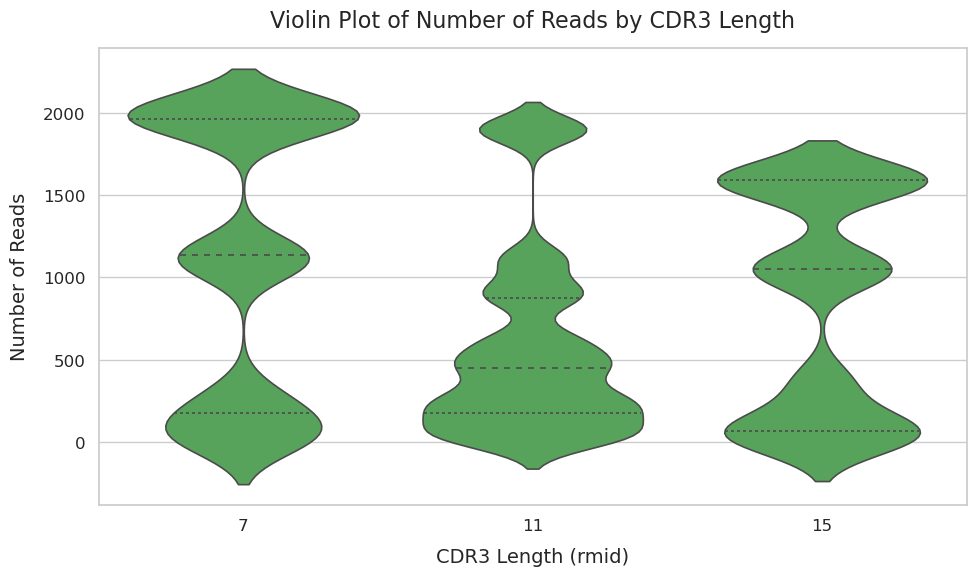

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame
filtered_df = Dataset[Dataset['CDR3_length-rmid'].isin([7, 11, 15])]

# Create the figure and plot
plt.figure(figsize=(10, 6))

# Set a publication-style theme
sns.set_theme(style="whitegrid", font_scale=1.2)

# Create the violin plot
sns.violinplot(
    data=Violon,
    x='CDR3_length-rmid',
    y='Number of Reads',
    inner='quartile',
    palette=['#4CAF50'] * 3,  # Green color for all plots,
    linewidth=1.2
)

# Customize the plot
plt.xlabel('CDR3 Length (rmid)', fontsize=14, labelpad=10)
plt.ylabel('Number of Reads', fontsize=14, labelpad=10)
plt.title('Violin Plot of Number of Reads by CDR3 Length', fontsize=16, pad=15)

# Adjust the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Tighten the layout
plt.tight_layout()

# Save the plot in high resolution
plt.savefig('violin_plot_publication.png', dpi=600, bbox_inches='tight')

# Show the plot
plt.show()
